# Proyecto final de la Primera Evaluación
Este proyecto tiene como finalidad el entrenamiento y configuración de un modelo de Regresión Lineal simple y múltiple.

In [2]:
import pandas as pd
import numpy as np

from seaborn import FacetGrid, scatterplot, histplot, boxplot
import matplotlib.pyplot as plt

In [3]:
path = '../data/datains_e.xlsx'
df = pd.read_excel(path)

## Estudio estructural de la base de datos 
Voy a utilizar un par de métodos de la librería `pandas` que me permitan observar la estructura de los datos dentro de la base de datos importada. 

*Inciso*:
Debemos eliminar la variable **index** del DataFrame puesto que no va a ser utilizada. Lo podemos hacer con la función `drop()`.

In [4]:
df = df.drop(labels='index', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       196 non-null    float64
 1   sex       198 non-null    object 
 2   bmi       196 non-null    float64
 3   children  199 non-null    float64
 4   smoker    197 non-null    object 
 5   region    200 non-null    object 
 6   charges   200 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.1+ KB


### Análisis
Como se puede observar, contamos con **7 columnas** en una tabla con un total de **200 registros**.

**4** de las 7 columnas (`age`, `sex`, `bmi`, `children`, `smoker`) cuentan **valores nulos** que deberemos tratar más adelante.

Como indica `dtypes` en el informe, contamos con **4 variables númericas** y **3 variables categóricas** que tendremos que codificar posteriormente para estudiar su correlación con el **target**. 

En este caso, nuestra **variable objetivo o target** es el importe del seguro (`charge`) que depende del resto de variables; las **features o variables objetivo**.

Ahora, voy a obsevar también algunas **medidas estadísticas** que serán útiles a la hora de hacer el **escalado de valores**.

In [6]:
# Tabla con medidas estadísticas básicas para cada variable numérica
df.describe()

,age,bmi,children,charges
count,196.000000,196.000000,199.000000,200.000000
mean,39.948980,32.417857,1.075377,13790.512035
std,13.752294,22.629577,1.118868,12195.955051
min,18.000000,16.815000,0.000000,1121.873900
25%,27.750000,26.407500,0.000000,5451.159125
50%,40.000000,30.800000,1.000000,9526.937700
75%,51.000000,34.900000,2.000000,17610.229900
max,64.000000,334.700000,5.000000,52590.829390


## EDA (Análisis Exploratorio de Datos) 
Una vez estudiada la estrucutra básica de los datos, debemos realizar el EDA. Este proceso va a consistir en los siguientes pasos:
- Análisis descriptivo
- Codificación de variables categóricas
- Identificación y tratamiento de valores nulos -> **valores NaN**
- Identificación y tratamiento de valores atípicos -> **outliers**
- Estudio de correlación entre las variables de la base de datos.

### Análisis descriptivo
En este proceso, voy a obsevar la **distribución de los datos** utilizando los **histogramas** y también su **concentración** a través de **diagramass de caja y bigote**. 
Para ello, voy a utilizar las funciones `histplot` y `boxplot` de la librería `seaborn`.

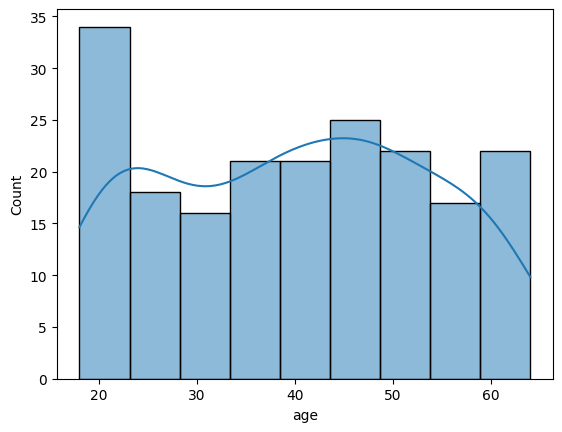

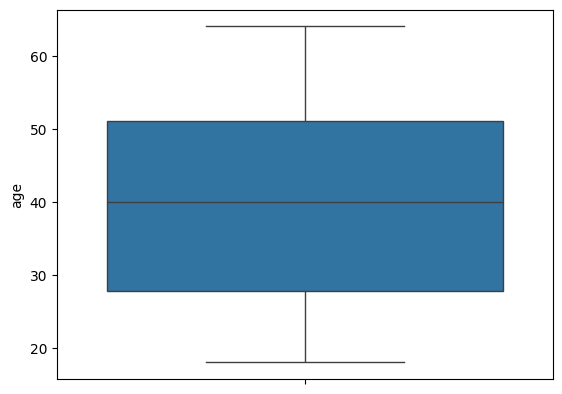

In [7]:
# Para la variable 'age'
col = 'age'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'age'**, los datos están basatante concetrados como muestran ambos gráficos. También se puede observar la ausencia de **outliers** y cierta asimetría en la distribución de los datos, pero sin presencia de un sesgo aparente.

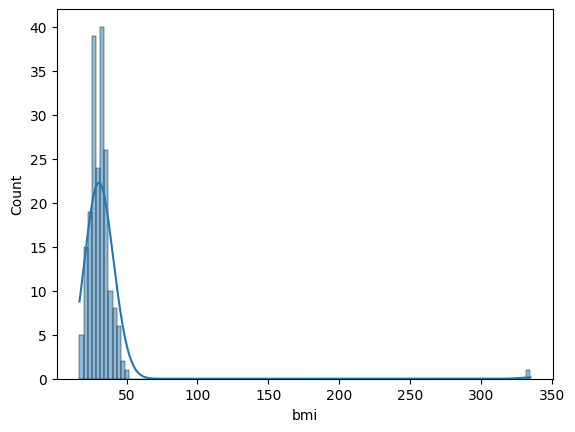

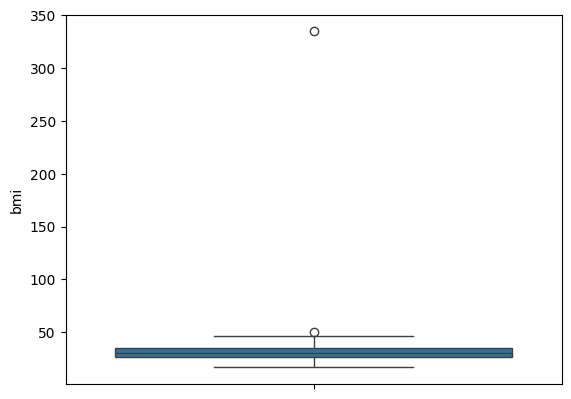

In [8]:
# Para la variable 'bmi'
col = 'bmi'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'bmi'**, la presencia de **outliers** es claramente notable. En la propia distribución de los datos se puede observar un valor que se encuentra completamente fuera del rango normal de los valores. Esto también se observa dentro del diagrama de caja y bigote que se encuentra debajo, donde encontramos al menos otro outlier más cercano al resto de valores. 

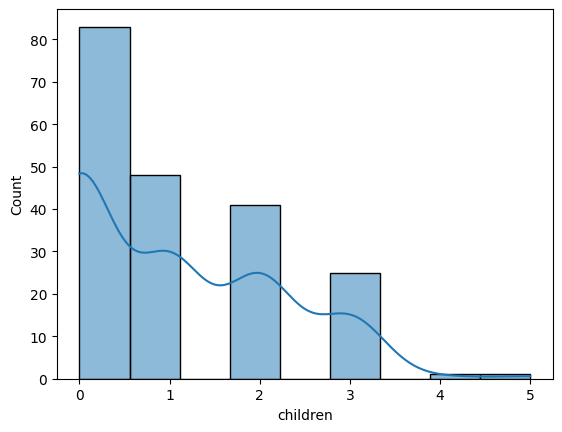

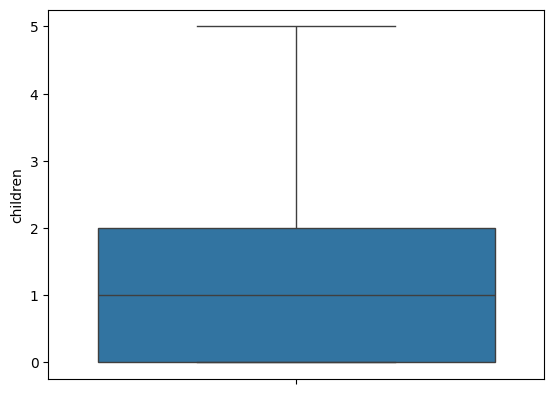

In [9]:
# Para la variable 'children'
col = 'children'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'children'**, encontramos una variable numérica discreta, ya que sólo toma valores dentro del rango [0, 5]. Podemos observar asimetría en la distribución de los datos, sesgada hacia la izquierda. Es notable también en los dos gráficos que la concentración de los datos la encontramos principalmente dentro del rango [0, 2], siendo 4 y 5 los valores más altos que puede tomar. En este caso no hay outliers al ser valores que se situán dentro de un rango razonable. 

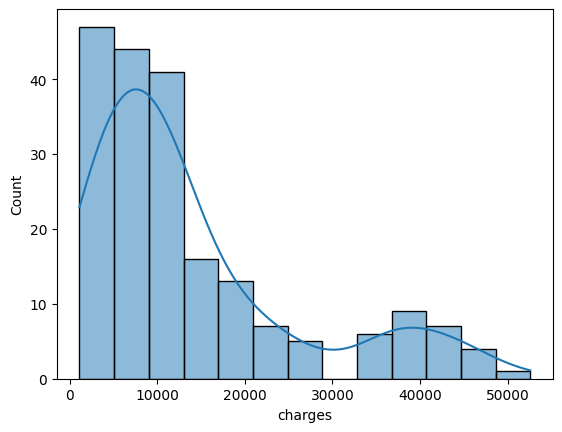

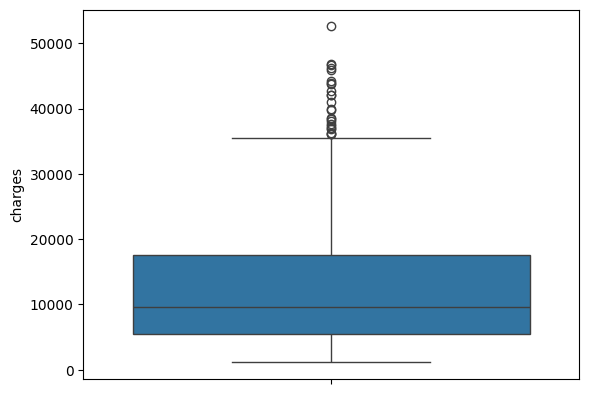

In [11]:
# Para la variable 'charges'
col = 'charges'
histplot(df[col], kde=True)
plt.show()
boxplot(df[col])
plt.show()

Para la variable **'charges'**, observamos una distribución similar a la anterior. Presenta asimetría positiva ya que está sesgada hacia la derecha. Se observa una gran concentración entre los valores **0 y 30000**. El resto de valores, como se representa en el diagrama de caja y bigote son outliers. En este caso, algunos de los valores atípicos podrían tratarse sólo de importes muy altos del seguro y teniendo en cuenta el bajo número de registros, no sería conveniente eliminar todos los outliers. 

De las variables categóricas podemos estudiar la medida estadística de la **moda**.

Puesto que ya contamos con la función `histplot` para representar diagramas de barras, podemos representar el recuento de valores que toma la variable categórica y de ahí sacar su moda.

<Axes: xlabel='region', ylabel='Count'>

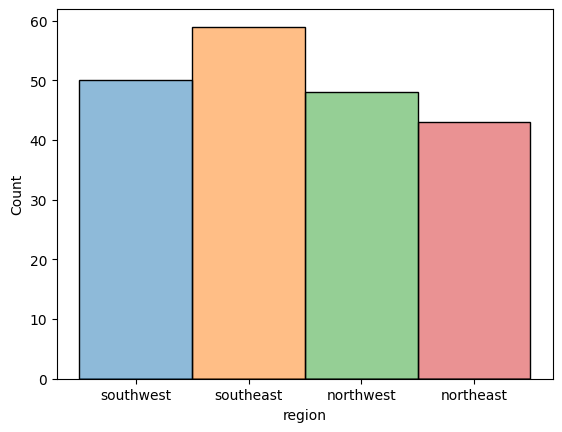

In [18]:
# Para la variable 'region'
col = df['region']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'region'**, la tendencia a vivir es en el suroeste, ya que la moda para esta variable es **'southeast'**.

<Axes: xlabel='sex', ylabel='Count'>

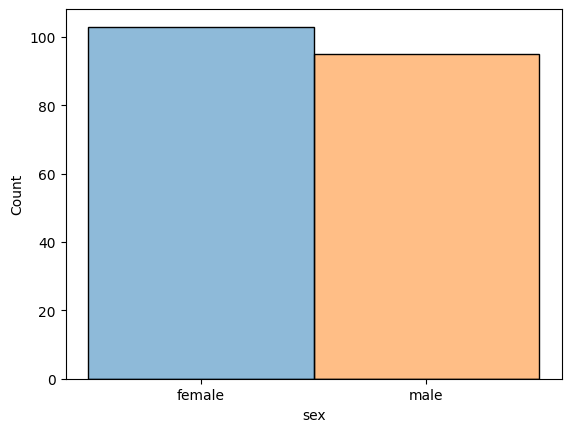

In [19]:
# Para la variable 'sex'
col = df['sex']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'sex'**, se observa que la mayoría de contrataciones están realizadas por mujeres, puesto que la moda de esta variable es **'female'**.

<Axes: xlabel='smoker', ylabel='Count'>

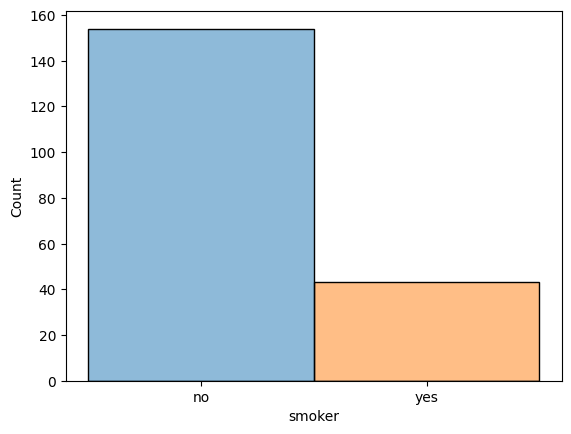

In [20]:
# Para la variable 'smoker'
col = df['smoker']
histplot(data=df, x=col, hue=col, legend=False)

Para la variable **'smoker'**, se observa una mayor tendencia a **no** ser fumador que a que sí, dado que la moda claramente para esta variable es **'no'**.